In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [3]:
import os
os.chdir(r"C:\Users\hanis\OneDrive\Desktop\Kamakshigari Hanish FWI")

data = pd.read_csv("train_data.csv")



In [4]:
target_col = [c for c in data.columns if "fire" in c.lower() and "index" in c.lower()]
if len(target_col) == 0:
    raise ValueError("Target column not found, please set manually.")
target_col = target_col[0]
print("Target Column Detected:", target_col)


Target Column Detected: fire_weather_index


In [6]:
X = data.drop(columns=[target_col])
y = data[target_col]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
numeric_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(exclude='number').columns

In [9]:
numeric_transformer = Pipeline(steps=[
    ('power', PowerTransformer()),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [10]:
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Results:")
print("RMSE:", round(rmse_ridge, 2))
print("R2 Score:", round(r2_ridge, 2))

Ridge Regression Model Results:
RMSE: 6.04
R2 Score: 0.85


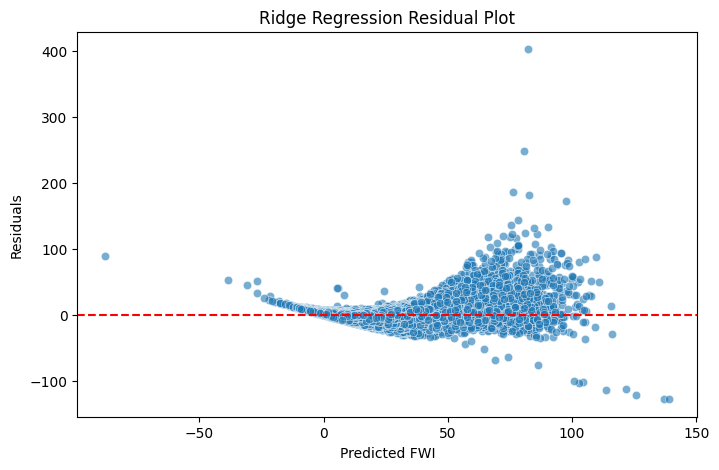

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_ridge, y=y_test - y_pred_ridge, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted FWI")
plt.ylabel("Residuals")
plt.title("Ridge Regression Residual Plot")
plt.show()


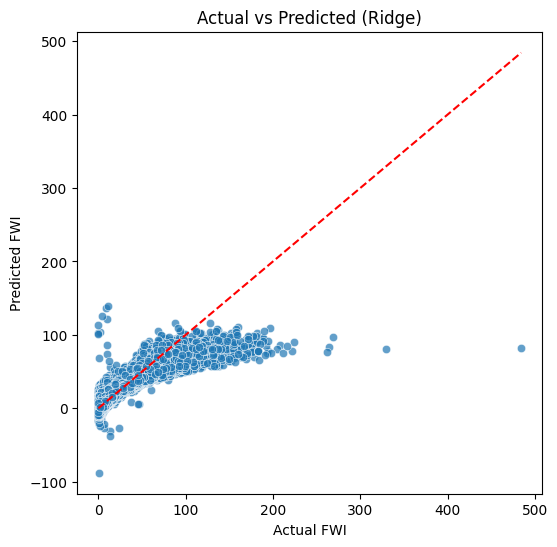

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted (Ridge)")
plt.show()

In [13]:
with open("ridge_model_v1.pkl", "wb") as f:
    pickle.dump(ridge_model, f)

with open("preprocessor_v1.pkl", "wb") as f:
    pickle.dump(preprocessor, f)